# Spam dataset classification

In [1]:
import scipy.io as sio
import numpy as np
import random
import math
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import csv
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV

## Data partitioning

In [41]:
# Read in the file
train_mat = sio.loadmat("spam_data.mat")


In [42]:
# Understand the data content
train_mat.keys()

dict_keys(['training_data', '__header__', '__globals__', 'test_data', '__version__', 'training_labels'])

In [43]:
# Get the training data
train_data = train_mat['training_data']

In [44]:
# Get the training label
train_labels = train_mat['training_labels'][0]

In [45]:
# Check the amount of data in the training set
print(train_data.shape)
print(train_labels.shape)

(5172, 47)
(5172,)


In [46]:
# Shuffle the data
train_data, train_labels = shuffle(train_data, train_labels, random_state=0)

In [47]:
# Set aside 20% training sample as a validation set
size = int(math.ceil(train_data.shape[0] * 0.2))
validation_index = np.array(random.sample(range(train_data.shape[0]), size))
validation_data = train_data[validation_index]
validation_labels = train_labels[validation_index]

In [48]:
# Verify the validation set size
print(validation_data.shape )
print(validation_labels.shape)

(1035, 47)
(1035,)


In [49]:
# Construct the training set
training_data = np.delete(train_data, validation_index, 0)
training_labels = np.delete(train_labels, validation_index, 0)
print(training_data.shape)
print(training_labels.shape)

(4137, 47)
(4137,)


In [50]:
#Normalize the given data
def normalize_data(data):
    result_data = np.zeros(data.shape)
    for i in range(data.shape[0]):
        result_data[i] = normalize(data[i][:,np.newaxis], axis=0).ravel()
    return result_data

## SVM

In [51]:
# Normalize the validation data
norm_validation_data = normalize_data(validation_data)
    
print(validation_data.shape)

(1035, 47)


In [52]:
#Normalize the training_data
norm_training_data = normalize_data(training_data)  
print(training_data.shape)

(4137, 47)


### Training on n examples

In [14]:
accuracy_score = []
training_accuracy_score = []
def training_classifier(n):
    # Get n training data
    training_data1 = norm_training_data[0:n]
    training_labels1 = training_labels[0:n]
    print(training_data1.shape)
    print(training_labels1.shape)
    # Build the SVC classifier
    classifier1 = SVC(kernel='linear')
    classifier1.fit(training_data1, training_labels1)
    # Make prediction
    score1 = classifier1.score(norm_validation_data, validation_labels)
    score2 = classifier1.score(training_data1, training_labels1)
    print("accuracy score", score1)
    accuracy_score.append(score1)
    training_accuracy_score.append(score2)

In [15]:
training_size = [100, 200, 500, 1000, 2000, training_data.shape[0]]
for n in training_size:
    training_classifier(n)
print(accuracy_score)

(100, 32)
(100,)
accuracy score 0.793236714976
(200, 32)
(200,)
accuracy score 0.800966183575
(500, 32)
(500,)
accuracy score 0.804830917874
(1000, 32)
(1000,)
accuracy score 0.809661835749
(2000, 32)
(2000,)
accuracy score 0.811594202899
(4137, 32)
(4137,)
accuracy score 0.808695652174
[0.79323671497584536, 0.80096618357487925, 0.80483091787439609, 0.80966183574879225, 0.81159420289855078, 0.80869565217391304]


## Plot the accuracy score 

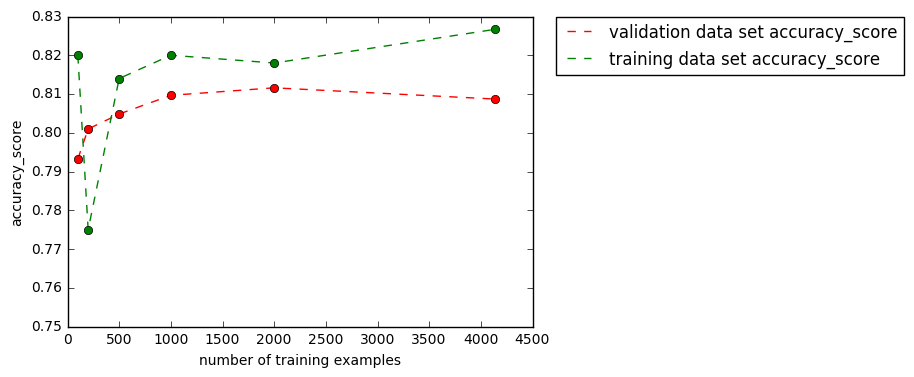

In [16]:
plt.plot(training_size, accuracy_score, "r--", label = "validation data set accuracy_score")
plt.plot(training_size, accuracy_score, "ro")
plt.plot(training_size, training_accuracy_score, "g--", label = "training data set accuracy_score")
plt.plot(training_size, training_accuracy_score, "go")
plt.ylabel("accuracy_score")
plt.xlabel("number of training examples")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 4500, 0.75, 0.83])
plt.show()

## K-Fold Cross-Validation

In [53]:
k = 5
parameters = {'C': list(range(100, 10, -1)) + [math.pow(10, 1), math.pow(10, 0), math.pow(10, -1), math.pow(10, -2),
      math.pow(10, -3), math.pow(10, -4), math.pow(10, -5),math.pow(10, -6), 
      math.pow(10, -7),math.pow(10, -8)]}
svc = SVC()

In [54]:
# Cross validation and find the best C
training_index = np.array(random.sample(range(training_data.shape[0]), size))
search_clf = GridSearchCV(svc, parameters, cv = k)
search_clf.fit(norm_training_data[training_index], training_labels[training_index])
best_c = search_clf.best_params_['C']

In [55]:
# best_c with non-norm size =1035 is 47; best_c with norm size =1035 is 100; 
# best_c with non-norm size = 2000 is 75;
best_c

89

In [56]:
clf = SVC(C = best_c)
clf.fit(norm_training_data, training_labels)
score = clf.score(norm_training_data, training_labels)
print(score)

0.873579888808


In [57]:
score = clf.score(norm_validation_data, validation_labels)
print(score)

0.872463768116


## Kaggel Prediction

In [58]:
# Get the test data
test_data = train_mat['test_data']
test_data

#Normalize the test data
norm_test_data = normalize_data(test_data)

# Make predictions
best_clf = SVC(C = best_c)
best_clf.fit(norm_training_data, training_labels)
predictions = best_clf.predict(norm_test_data)

In [59]:
predictions

array([0, 0, 0, ..., 1, 0, 0])

Write the prediction to csv file

In [61]:
i = 0
with open('feature_rbf_norm_spam_submission_89.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Id'] + ['Category'])
    for num in predictions:
        writer.writerow([i] + [num])
        i += 1

In [29]:
print(best_c)


100
